In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# 6 Critical Slowing Down

In [27]:
def gen_ensemble(N):
    sigma = np.random.choice([-1, 1], size=(N,N))
    
    return sigma

def delta_S(sigma, x, y, J):
    neighbor1 = sigma[(x - 1) % N, (y - 1) % N]
    neighbor2 = sigma[(x - 1) % N, (y + 1) % N]
    neighbor3 = sigma[(x + 1) % N, (y - 1) % N]
    neighbor4 = sigma[(x + 1) % N, (y + 1) % N]
   
    delta_S_interaction = 2 * J * sigma[x] * (neighbor1 + neighbor2 + neighbor3 + neighbor4)
    return np.mean(delta_S_interaction) 

def single_site_update(sigma, J):
    for x in np.random.permutation(N):
        for y in np.random.permutation(N):
            delta_s = delta_S(sigma, x, y, J)
            if np.random.rand() < min(1, np.exp(-delta_s)):
                sigma[x] *= -1 

def gen_ensemble0(N):
    eps = 0.125
    
    while True:
        sigma = np.random.choice([-1, 1], size=(N,N))
        if abs(np.mean(sigma)) > eps:
            continue
        if abs(np.mean(sigma)) == 0.0:
            continue
        if abs(np.mean(sigma)) <= eps:
            break
    return sigma

def hamiltonian2d(J, sigma):
    H = 0
    N = sigma.shape[0]

    
    for i in range(N):
        for j in range(N):
            H -= J * sigma[i,j] * (sigma[(i+1)%N, j] + sigma[i, (j+1)%N])
            
    return H
    

## 6.1 Spontaneous Magnetization

In [4]:
N_val = [4, 8, 12]
N = 4
Jc = 0.4407
J_val = [0.1, 0.2, Jc, 0.7, 0.8]

In [5]:
num_samples = 500
num_repeats = 50

magnetizations = []

for N in N_val:
    sigma = gen_ensemble0(N)
    for J in J_val:
        for _ in range(num_repeats):
            m_values = []
            for _ in range(num_samples):
                single_site_update(sigma, J)
                m_values.append(np.mean(sigma))

            magnetizations.append(np.mean(m_values))
        print(J)
    print(N)
m_abs_list = [abs(m) for m in magnetizations]
    
m_abs = np.array(m_abs_list)

m_abs = m_abs.reshape(len(J_val), num_repeats, len(N_val))

    

0.1
0.2
0.4407
0.7
0.8
4
0.1
0.2
0.4407
0.7
0.8
8
0.1
0.2
0.4407
0.7
0.8
12


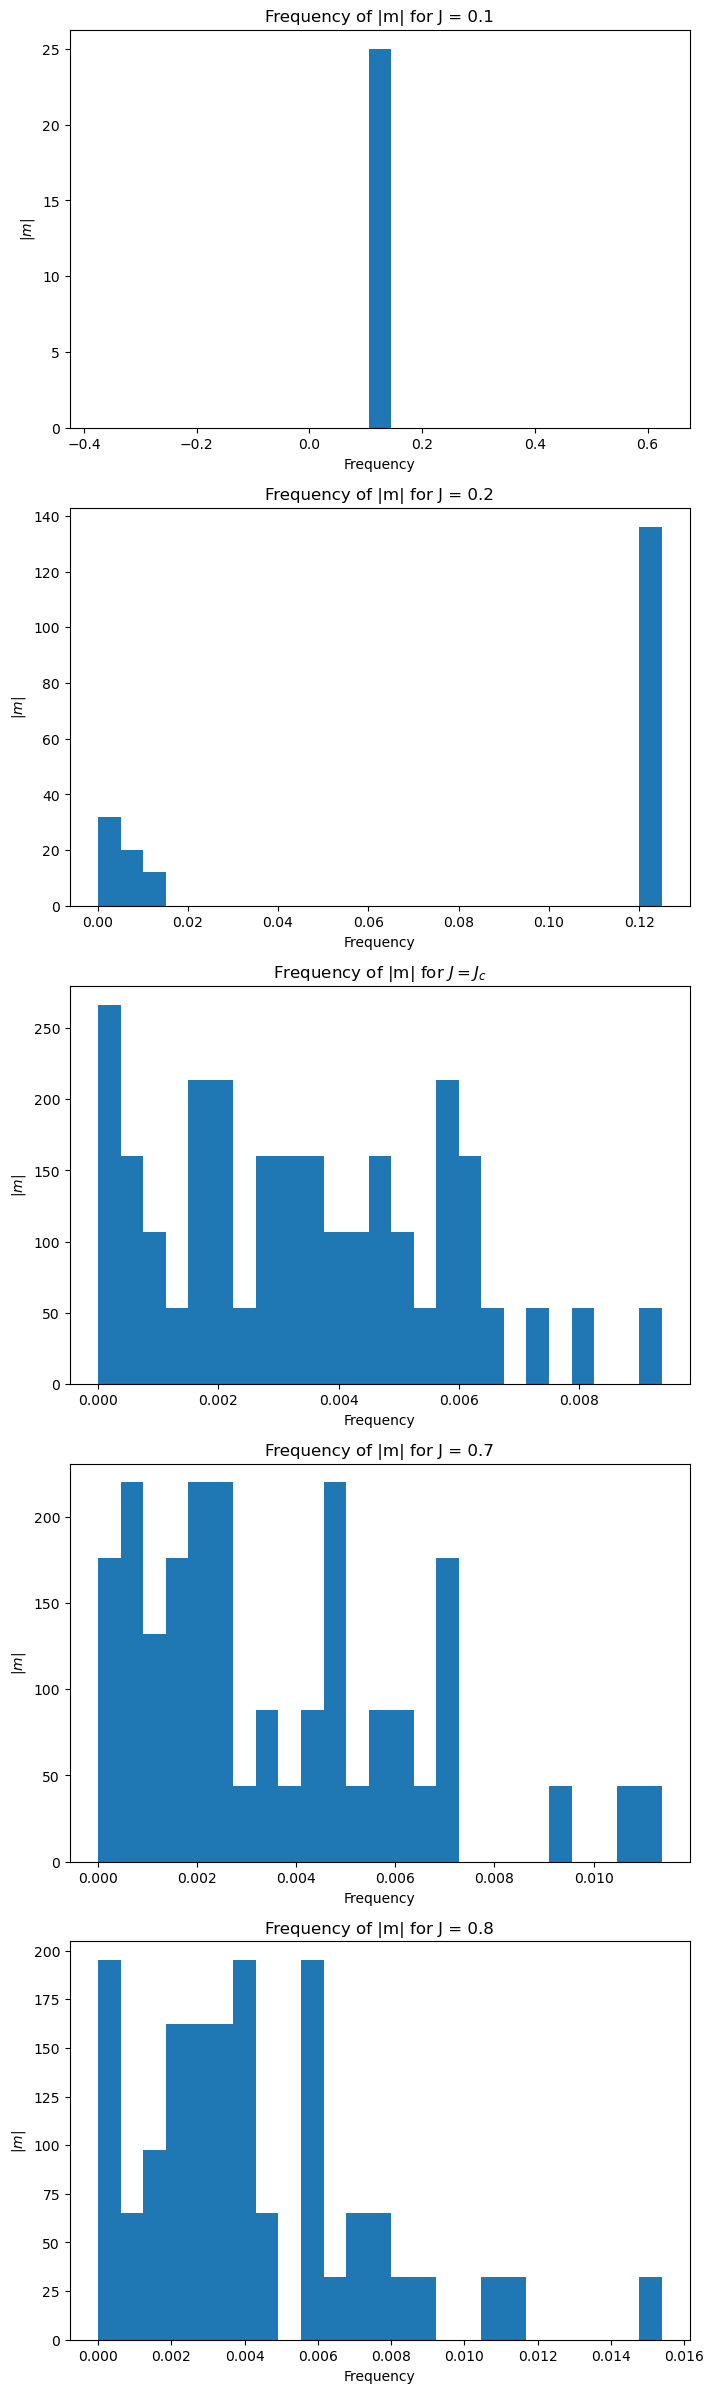

In [6]:
fig, ax = plt.subplots(len(J_val), figsize=(8,30))

i = 0
for J in J_val:  
    ax[i].hist(m_abs[i,:,0], bins=25, density=True, label=f'J = {J}')
    if J == Jc:
        ax[i].set_title(r'Frequency of |m| for $J = J_c$')
    else:
        ax[i].set_title(f'Frequency of |m| for J = {J}')
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel(r'$|m|$')  
    
    i += 1

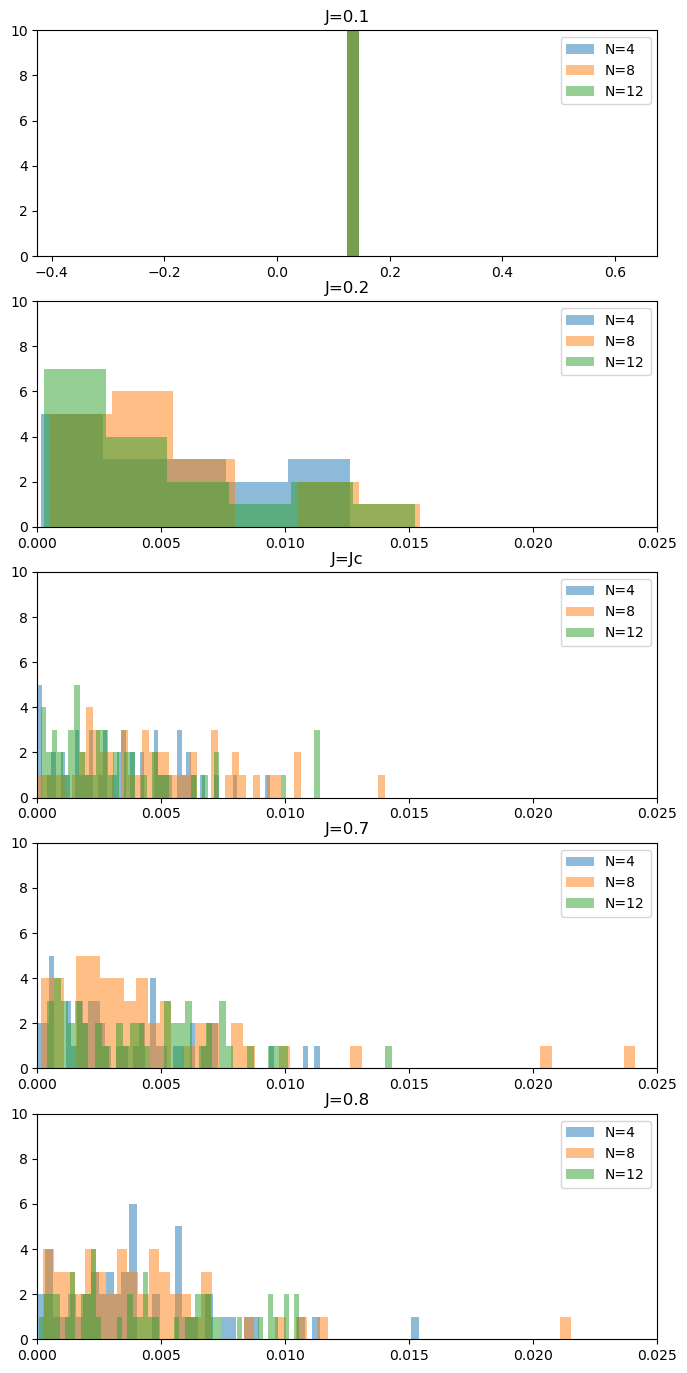

In [70]:
fig, ax = plt.subplots(len(J_val), figsize=(8,17))

for i in range(len(J_val)):
    for j in range(len(N_val)):
        ax[i].hist(m_abs[i,:,j], bins=50, alpha=0.5, label=f'N={N_val[j]}')
        ax[i].legend()
        if J_val[i] == Jc:
            ax[i].set_title(f'J=Jc')
        else:
            ax[i].set_title(f'J={J_val[i]}')
        if i == 0:
            ax[i].set_xlim()
        else:
            ax[i].set_xlim([0.0,0.025])
        ax[i].set_ylim([0.0,10.0])


## 6.2 Scanning J

In [29]:
J_inv = np.linspace(1.0, 4.0, num=31)
J_val = 1/J_inv
N_val = [4, 8, 12]
num_samples = 2000

magnetizations = []
uncertainty = []
epsilon = []

for J in J_val:
    m_values = []
    m_err = []
    energy = []
    sigma = gen_ensemble0(4)
    for _ in range(num_samples):
        single_site_update(sigma, J)
        m_values.append(np.mean(sigma))
        m_err.append(np.std(sigma))
        energy.append(hamiltonian2d(J,sigma))
                
    magnetizations.append(np.mean(m_values))
    uncertainty.append(np.mean(m_err))
    epsilon.append(np.mean(energy))

m_abs = [abs(m) for m in magnetizations]



Text(0, 0.5, '$\\frac{\\epsilon}{J}$')

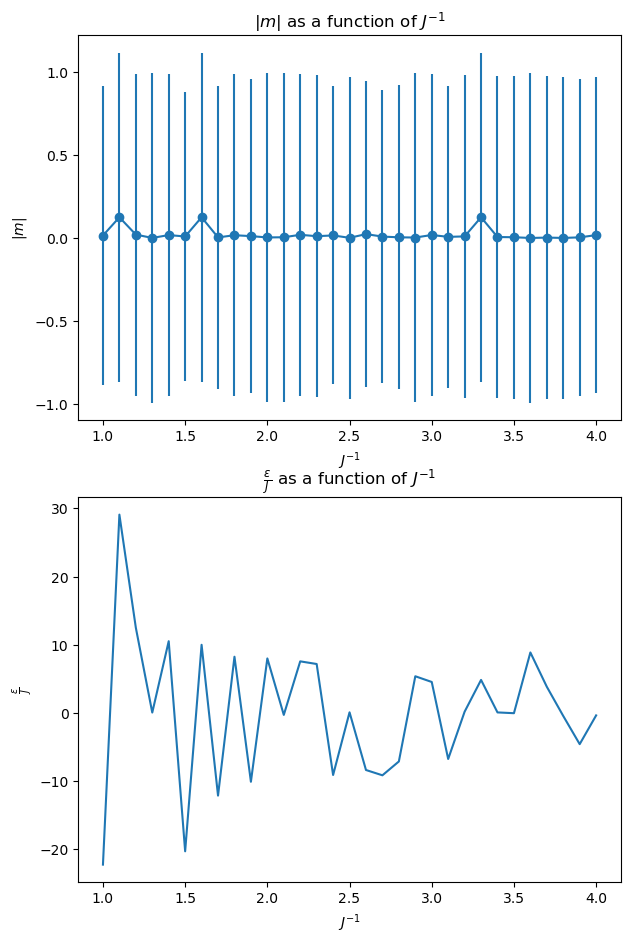

In [36]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7,11))

ax0.errorbar(J_inv, m_abs, yerr=uncertainty, fmt='-o')
ax0.set_title(r'$|m|$ as a function of $J^{-1}$')
ax0.set_xlabel(r'$J^{-1}$')
ax0.set_ylabel(r'$|m|$')
ax1.plot(J_inv, epsilon/J)
ax1.set_title(r'$\frac{\epsilon}{J}$ as a function of $J^{-1}$')
ax1.set_xlabel(r'$J^{-1}$')
ax1.set_ylabel(r'$\frac{\epsilon}{J}$')
